In [10]:
#Линейный метод классификации
#Выгрузить новости с сайта и кластеризовать их с использованием векторного представления Word2Vec

In [11]:
import requests
from bs4 import BeautifulSoup
import re

In [12]:
requests.get("https://miem.hse.ru/news")

<Response [200]>

In [13]:
resp = requests.get("https://www.hse.ru/news")

In [14]:
#Получили BeautifulSoup и скормили ему текст страницы
bs = BeautifulSoup(resp.text, "html5lib")

title = bs.h2.text

#Получаем все параграфы, берем текст без тегов и склеиваем в один текст.
text = "\n".join([p.text for p in bs.find_all("p")])
print(title, "\n-----\n", text)

Студенты питерской Вышки победили в кейс-чемпионате Правительства Санкт-Петербурга 
-----
 Мы используем файлы cookies для улучшения работы сайта НИУ ВШЭ и большего удобства его использования. Более подробную информацию об использовании файлов cookies можно найти здесь, наши правила обработки персональных данных – здесь. Продолжая пользоваться сайтом, вы подтверждаете, что были проинформированы об использовании файлов cookies сайтом НИУ ВШЭ и согласны с нашими правилами обработки персональных данных. Вы можете отключить файлы cookies в настройках Вашего браузера.
Главный корпус
109028, г. Москва, Покровский бульвар, д. 11
Справочная:
+ 7 495 771-32-32
Для соединения с внутренним номером подразделения/сотрудника:
+7 495 531-00-00
+ 7 495 772-95-90
Узнать телефонный номер сотрудника
Факс: + 7 495 628-79-31
hse@hse.ru
Приемная комиссия
Москва, ул. Мясницкая, д. 20
+ 7 495 771 32 42
+ 7 495 916 88 44
abitur@hse.ru
 
MyHSEhouse - твои возможности для жизни в большом городе
Общежития
Управле

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

base_url = "https://www.hse.ru/news/page{}.html"

news_data = []

for page in range(1, 60):
    url = base_url.format(page)
    print(f"Загружаем: {url}")

    response = requests.get(url)
    if response.status_code != 200:
        print(f"Ошибка загрузки страницы {page}")
        continue

    soup = BeautifulSoup(response.text, "html.parser")

    posts = soup.find_all("div", class_="post")

    for post in posts:
        title_tag = post.find("a", class_="link")
        if not title_tag:
            continue
        title = title_tag.get_text(strip=True)
        link = title_tag["href"]

        if link.startswith("/"):
            link = "https://www.hse.ru" + link
        news_data.append({"title": title, "link": link})

    time.sleep(1)

df = pd.DataFrame(news_data)
print(f"Собрано {len(df)} новостей")
df.head()

Загружаем: https://www.hse.ru/news/page1.html
Загружаем: https://www.hse.ru/news/page2.html
Загружаем: https://www.hse.ru/news/page3.html
Загружаем: https://www.hse.ru/news/page4.html
Загружаем: https://www.hse.ru/news/page5.html
Загружаем: https://www.hse.ru/news/page6.html
Загружаем: https://www.hse.ru/news/page7.html
Загружаем: https://www.hse.ru/news/page8.html
Загружаем: https://www.hse.ru/news/page9.html
Загружаем: https://www.hse.ru/news/page10.html
Загружаем: https://www.hse.ru/news/page11.html
Загружаем: https://www.hse.ru/news/page12.html
Загружаем: https://www.hse.ru/news/page13.html
Загружаем: https://www.hse.ru/news/page14.html
Загружаем: https://www.hse.ru/news/page15.html
Загружаем: https://www.hse.ru/news/page16.html
Загружаем: https://www.hse.ru/news/page17.html
Загружаем: https://www.hse.ru/news/page18.html
Загружаем: https://www.hse.ru/news/page19.html
Загружаем: https://www.hse.ru/news/page20.html
Загружаем: https://www.hse.ru/news/page21.html
Загружаем: https://www

,title,link
0,Студенты питерской Вышки победили в кейс-чемпи...,https://spb.hse.ru/news/1098211977.html
1,Студенты Вышки — призеры хакатона «Лидеры цифр...,https://www.hse.ru/news/edu/1098227060.html
2,Магистрант Вышки — семикратный чемпион России ...,https://www.hse.ru/news/life/1098197960.html
3,"«Математика как единый язык для естественных, ...",https://www.hse.ru/news/science/1097943294.html
4,НИУ ВШЭ представил рейтинг регионов России по ...,https://www.hse.ru/news/expertise/1098012767.html


In [15]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

russian_stopwords = stopwords.words('russian')

#Чистим
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яa-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in russian_stopwords and len(t) > 2]
    return tokens

df["tokens"] = df["title"].apply(preprocess_text)
print("Пример токенизации:")
print(df["tokens"].head())

Пример токенизации:
0    [студенты, питерской, вышки, победили, кейсчем...
1    [студенты, вышки, призеры, хакатона, лидеры, ц...
2    [магистрант, вышки, семикратный, чемпион, росс...
3    [математика, единый, язык, естественных, эконо...
4    [ниу, вшэ, представил, рейтинг, регионов, росс...
Name: tokens, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Обучаем
sentences = df["tokens"].tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, seed=42)

In [17]:
#Векторно представляем
def vectorize(tokens):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:
        return None
    return sum(vecs) / len(vecs)

df["vector"] = df["tokens"].apply(vectorize)
df = df.dropna(subset=["vector"])

In [20]:
#Кластеризируем
X = list(df["vector"])
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

print("\nПримеры новостей по кластерам:")
for i in range(n_clusters):
    print(f"\nКластер {i}:")
    print(df[df["cluster"] == i]["title"].head(5).to_string(index=False))


Примеры новостей по кластерам:

Кластер 0:
Студенты питерской Вышки победили в кейс-чемпио...
Магистрант Вышки — семикратный чемпион России п...
Студенты Вышки взяли призовые места на ИТ-хакат...
              «Книга — то, что делает вас видимым»
«Делать мир вокруг лучше»: основательница Wildb...

Кластер 1:
Ошибки, которые всё объясняют: ученые обсудили ...
Встреча с делегацией «Синьхуа»: в Вышке обсудил...
«Я никогда не сомневался, что окажусь именно в ...
На перекрестке теории и практики: международная...
Как чувствительность к отвержению влияет на бла...

Кластер 2:
Вышка и ведущая бизнес-школа Таиланда договорил...
Вышка запустила международный проект по изучени...
Исчезнувший сигнал: как солнечная активность за...
Вышка приняла участие в конференции по междунар...
План по валу: как публикационная активность при...

Кластер 3:
Студенты Вышки — призеры хакатона «Лидеры цифро...
«Математика как единый язык для естественных, э...
Углеродные единицы и рынок будущего: в ВШЭ стар...
Ли

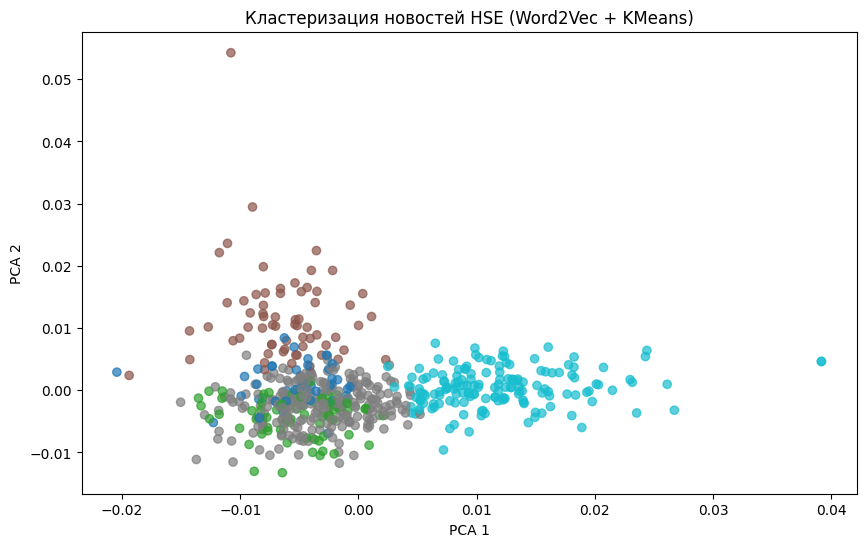

In [21]:
#Визуализируем
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df["cluster"], cmap="tab10", alpha=0.7)
plt.title("Кластеризация новостей HSE (Word2Vec + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()